<a href="https://colab.research.google.com/github/syedmahmoodiagents/Stategraph/blob/main/Basic_StateGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class MNP:
  v = 10

In [2]:
print(MNP.v)

10


In [3]:
ob = MNP()

In [4]:
ob.v

10

In [5]:
ob.v = 20

In [6]:
MNP.v

10

In [7]:
ob.v

20

In [9]:
ob.v1 = 20

In [10]:
ob.v1

20

In [11]:
ob.__dict__

{'v': 20, 'v1': 20}

In [12]:
ob.v2 = MNP()

In [13]:
ob.__dict__

{'v': 20, 'v1': 20, 'v2': <__main__.MNP at 0x7ba9a4f49040>}

In [15]:
ob.v2.v1 = 10

In [18]:
ob.__dict__

{'v': 20, 'v1': 20, 'v2': <__main__.MNP at 0x7ba9a4f49040>}

In [17]:
ob.v2.__dict__

{'v1': 10}

In [ ]:
import langgraph

In [ ]:
import importlib.metadata
print(importlib.metadata.version('langgraph'))

1.0.5


In [ ]:
from typing import TypedDict

class MyState(TypedDict):
    count: int


In [ ]:
ms = MyState()

In [ ]:
ms["count"] = 3

In [ ]:
ms["count"]

3

In [ ]:
# def abcd(cnt: int)->int:
#   return cnt + 1

In [ ]:
# abcd(3)

In [ ]:
def increment(st: MyState) -> MyState:
    return {"count": st["count"] + 1}


In [ ]:
increment(ms)

{'count': 4}

In [ ]:
from langgraph.graph import StateGraph, END

In [ ]:
graph = StateGraph(MyState)

In [ ]:
graph.add_node("increment", increment)

In [ ]:
graph.set_entry_point("increment")

In [ ]:
graph.add_edge("increment", END)

In [ ]:
app = graph.compile()

In [ ]:
result = app.invoke({"count": 8})

In [ ]:
print(result)

{'count': 9}


In [ ]:
from IPython.display import Image, display

In [ ]:
imggraph = app.get_graph().draw_mermaid_png()

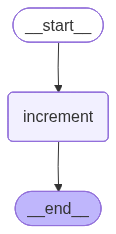

In [ ]:
display(Image(imggraph))

In [ ]:
# pillow
from PIL import Image
import io

image_data = app.get_graph().draw_mermaid_png()
img = Image.open(io.BytesIO(image_data))
img.show()


# Two Nodes

In [ ]:
def increment(state: MyState):
    return {"count": state["count"] + 1}

def double(state: MyState):
    return {"count": state["count"] * 2}


In [ ]:
graph = StateGraph(MyState)

graph.add_node("increment", increment)
graph.add_node("double", double)

graph.set_entry_point("increment")
graph.add_edge("increment", "double")
graph.add_edge("double", END)

app2 = graph.compile()


In [ ]:
app2.invoke({"count": 2})


{'count': 6}

In [ ]:
imggraph2 = app.get_graph().draw_mermaid_png()

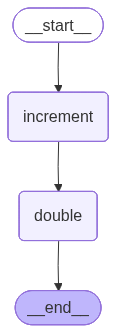

In [ ]:
display(Image(imggraph2))


# MessageState